# Import and merge data sets

In [26]:
import os
import lasio
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Import 98 LAS files and convert to DataFrame
las_files_path = 'TRAIN DATA'
las_files = [f for f in os.listdir(las_files_path) if f.endswith('.las.txt')]

dfs = []
non_mutual_columns = set()

for las_file in las_files:
    las = lasio.read(os.path.join(las_files_path, las_file))
    df = las.df()
    #df['Well'] = las_file  # Assuming LAS files are named after wells
    dfs.append(df)
    
    # Update non_mutual_columns
    if not non_mutual_columns:
        non_mutual_columns.update(df.columns)
    else:
        non_mutual_columns.intersection_update(df.columns)

# Step 2: Remove non-mutual columns from each DataFrame
dfs = [df.drop(columns=list(df.columns.difference(non_mutual_columns))) for df in dfs]

# Step 3: Merge DataFrames
merged_df = pd.concat(dfs, ignore_index=True)

# Now, merged_df contains the merged data from all LAS files with common columns
# non_mutual_columns contains the columns that were not common across all LAS files


In [27]:
merged_df

,FORCE_2020_LITHOFACIES_CONFIDENCE,FORCE_2020_LITHOFACIES_LITHOLOGY,CALI,RDEP,DTC,NPHI,GR,RHOB,DEPTH_MD,X_LOC,Y_LOC,Z_LOC
0,NaN,NaN,NaN,NaN,206.224609,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,206.224625,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,206.224655,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,206.224670,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,206.224701,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
1920350,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1920351,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1920352,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1920353,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [28]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1920355 entries, 0 to 1920354
Data columns (total 12 columns):
 #   Column                             Dtype  
---  ------                             -----  
 0   FORCE_2020_LITHOFACIES_CONFIDENCE  float64
 1   FORCE_2020_LITHOFACIES_LITHOLOGY   float64
 2   CALI                               float64
 3   RDEP                               float64
 4   DTC                                float64
 5   NPHI                               float64
 6   GR                                 float64
 7   RHOB                               float64
 8   DEPTH_MD                           float64
 9   X_LOC                              float64
 10  Y_LOC                              float64
 11  Z_LOC                              float64
dtypes: float64(12)
memory usage: 175.8 MB


In [29]:
merged_df.describe()

,FORCE_2020_LITHOFACIES_CONFIDENCE,FORCE_2020_LITHOFACIES_LITHOLOGY,CALI,RDEP,DTC,NPHI,GR,RHOB,DEPTH_MD,X_LOC,Y_LOC,Z_LOC
count,1.232321e+06,1.223599e+06,1.263188e+06,1.815769e+06,1.546526e+06,859983.000000,1.889422e+06,1.197555e+06,1.818438e+06,1.818438e+06,1.818438e+06,1.818438e+06
mean,1.155752e+00,6.155237e+04,1.333342e+01,9.304319e+00,1.184519e+02,0.339272,6.873555e+01,2.224189e+00,1.903468e+03,4.758005e+05,6.675024e+06,-1.857787e+03
std,4.401812e-01,1.413850e+04,3.697144e+00,9.915244e+01,3.206574e+01,0.133661,3.466576e+01,3.919153e-01,1.059938e+03,3.004711e+04,1.351544e+05,1.030602e+03
min,1.000000e+00,3.000000e+04,2.340806e+00,1.000000e-04,0.000000e+00,-0.037328,-1.562818e+01,0.000000e+00,9.872000e+01,4.232375e+05,6.429286e+06,-5.435889e+03
25%,1.000000e+00,6.500000e+04,1.052502e+01,8.945773e-01,9.222409e+01,0.246315,4.513639e+01,2.069813e+00,1.047897e+03,4.509578e+05,6.560852e+06,-2.591631e+03
50%,1.000000e+00,6.500000e+04,1.261444e+01,1.386265e+00,1.203215e+02,0.333877,6.654464e+01,2.270216e+00,1.776361e+03,4.744074e+05,6.728315e+06,-1.743453e+03
75%,1.000000e+00,6.500000e+04,1.662500e+01,2.241294e+00,1.450251e+02,0.438660,8.815387e+01,2.465450e+00,2.629887e+03,4.906125e+05,6.787700e+06,-1.022294e+03
max,3.000000e+00,9.900000e+04,3.211106e+01,1.999997e+03,3.204789e+02,0.999570,1.141292e+03,3.457820e+00,5.477672e+03,5.459160e+05,6.853526e+06,-7.265216e+01


In [30]:
merged_df.isna().sum()

FORCE_2020_LITHOFACIES_CONFIDENCE     688034
FORCE_2020_LITHOFACIES_LITHOLOGY      696756
CALI                                  657167
RDEP                                  104586
DTC                                   373829
NPHI                                 1060372
GR                                     30933
RHOB                                  722800
DEPTH_MD                              101917
X_LOC                                 101917
Y_LOC                                 101917
Z_LOC                                 101917
dtype: int64

# Clean Merged Data

**Drop column with <50% data entry**


In [31]:
missing_percentage = merged_df.isnull().mean() * 100
columns_to_drop = missing_percentage[missing_percentage > 50].index
merged_df = merged_df.drop(columns=columns_to_drop)

In [32]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1920355 entries, 0 to 1920354
Data columns (total 11 columns):
 #   Column                             Dtype  
---  ------                             -----  
 0   FORCE_2020_LITHOFACIES_CONFIDENCE  float64
 1   FORCE_2020_LITHOFACIES_LITHOLOGY   float64
 2   CALI                               float64
 3   RDEP                               float64
 4   DTC                                float64
 5   GR                                 float64
 6   RHOB                               float64
 7   DEPTH_MD                           float64
 8   X_LOC                              float64
 9   Y_LOC                              float64
 10  Z_LOC                              float64
dtypes: float64(11)
memory usage: 161.2 MB


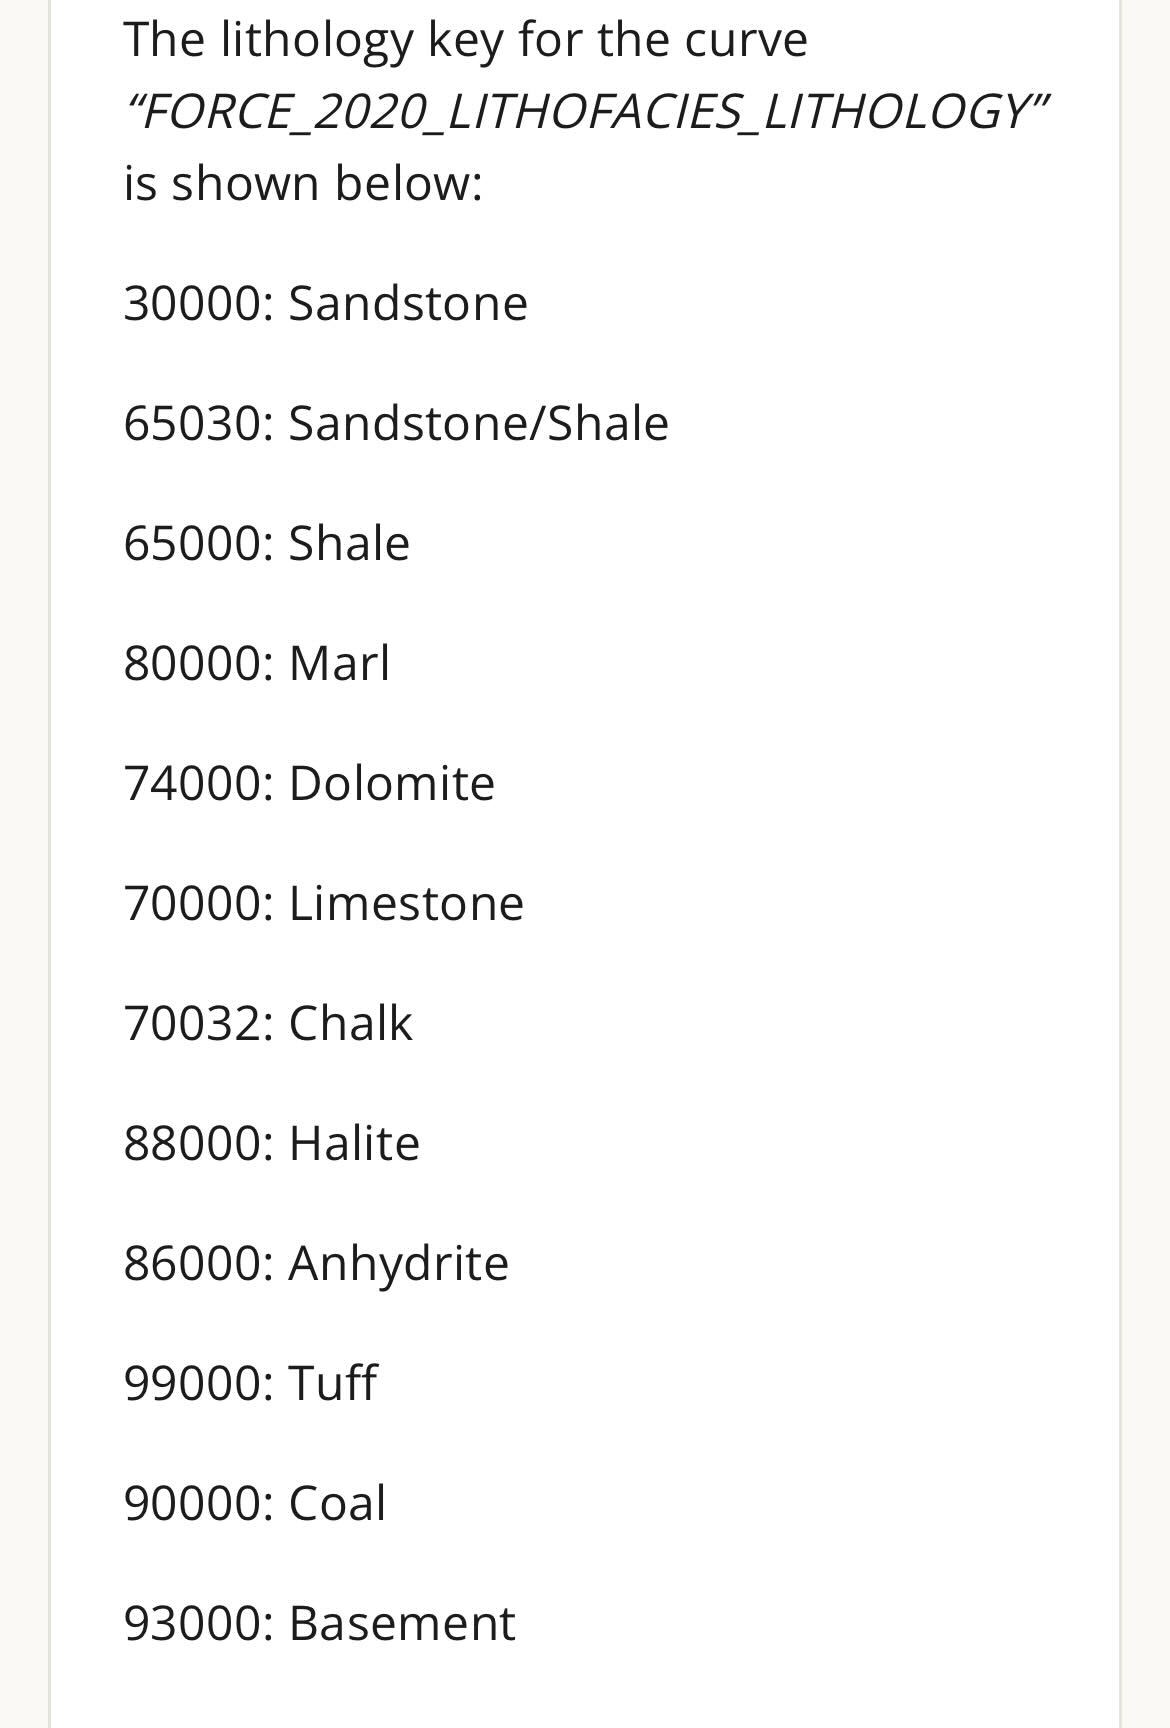

In [33]:
from IPython.display import display, Image

image_path = 'lithology facies.jpg'

display(Image(filename=image_path))

In [34]:
#Create a lithology dictionary
lithologies=  {30000: [0, "Sandstone"],
    65000: [1, "Shale"],
    65030: [2, "Sandstone/Stone"],
    70000: [3, "Limestone"],
    70032: [4, "Chalk"],
    74000: [5, "Dolomite"],
    80000: [6, "Marl"],
    99000: [7, "Tuff"],
    90000: [8, "Coal"],
    86000: [9, "Anhydrite"],
    88000: [10, "Halite"],
    93000: [11, "Basement"]}

In [35]:
merged_df["FORCE_2020_LITHOFACIES_LITHOLOGY"].unique()

array([   nan, 65000., 30000., 65030., 70000., 99000., 80000., 86000.,
       74000., 70032., 90000., 88000., 93000.])

In [36]:
for key, value in lithologies.items():
        merged_df.loc[merged_df["FORCE_2020_LITHOFACIES_LITHOLOGY"] == key, "FORCE_2020_LITHOFACIES_LITHOLOGY"] = lithologies[key][0]

In [37]:
merged_df["FORCE_2020_LITHOFACIES_LITHOLOGY"] = merged_df["FORCE_2020_LITHOFACIES_LITHOLOGY"].astype("Int64")

In [38]:
merged_df["FORCE_2020_LITHOFACIES_LITHOLOGY"].unique()

<IntegerArray>
[<NA>, 1, 0, 2, 3, 7, 6, 9, 5, 4, 8, 10, 11]
Length: 13, dtype: Int64

# Prepare Test Data

In [39]:
las=lasio.read("TEST DATA/35_4-1.las.txt")
test_data= las.df()
test_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 29967 entries, 403.604 to 4958.436
Data columns (total 18 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   FORCE_2020_LITHOFACIES_CONFIDENCE  23657 non-null  float64
 1   FORCE_2020_LITHOFACIES_LITHOLOGY   20825 non-null  float64
 2   CALI                               23569 non-null  float64
 3   BS                                 29960 non-null  float64
 4   ROP                                28160 non-null  float64
 5   RDEP                               29838 non-null  float64
 6   RMED                               29779 non-null  float64
 7   DTS                                19238 non-null  float64
 8   DTC                                28314 non-null  float64
 9   NPHI                               29430 non-null  float64
 10  PEF                                21378 non-null  float64
 11  GR                                 29956 non-null 

In [40]:
#Eliminate non mutual columns from merged_df
# Identify common columns
common_columns = merged_df.columns.intersection(test_data.columns)

test_data = test_data[common_columns]
test_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 29967 entries, 403.604 to 4958.436
Data columns (total 11 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   FORCE_2020_LITHOFACIES_CONFIDENCE  23657 non-null  float64
 1   FORCE_2020_LITHOFACIES_LITHOLOGY   20825 non-null  float64
 2   CALI                               23569 non-null  float64
 3   RDEP                               29838 non-null  float64
 4   DTC                                28314 non-null  float64
 5   GR                                 29956 non-null  float64
 6   RHOB                               21424 non-null  float64
 7   DEPTH_MD                           29838 non-null  float64
 8   X_LOC                              29838 non-null  float64
 9   Y_LOC                              29838 non-null  float64
 10  Z_LOC                              29838 non-null  float64
dtypes: float64(11)
memory usage: 2.7 MB


In [41]:
test_data["FORCE_2020_LITHOFACIES_LITHOLOGY"] = test_data["FORCE_2020_LITHOFACIES_LITHOLOGY"].astype("Int64")


In [42]:
test_data["FORCE_2020_LITHOFACIES_LITHOLOGY"].unique()

<IntegerArray>
[<NA>, 65000, 30000, 70000, 65030, 99000, 74000]
Length: 7, dtype: Int64

In [43]:
# Replace column's entries with corresponding discrete values for test data sets
for key, value in lithologies.items():
    test_data.loc[test_data["FORCE_2020_LITHOFACIES_LITHOLOGY"] == key, "FORCE_2020_LITHOFACIES_LITHOLOGY"] = lithologies[key][0]


In [44]:
test_data["FORCE_2020_LITHOFACIES_LITHOLOGY"].unique()

<IntegerArray>
[<NA>, 1, 0, 3, 2, 7, 5]
Length: 7, dtype: Int64

# Select a Model

In [45]:
#We'll be working with RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
np.random.seed(42)

merged_df= merged_df.dropna()
merged_df

,FORCE_2020_LITHOFACIES_CONFIDENCE,FORCE_2020_LITHOFACIES_LITHOLOGY,CALI,RDEP,DTC,GR,RHOB,DEPTH_MD,X_LOC,Y_LOC,Z_LOC
3089,1.0,1,19.480835,1.798681,161.131180,80.200851,1.884186,494.528015,437641.96875,6470972.5,-469.501831
3090,1.0,1,19.468800,1.795641,160.603470,79.262886,1.889794,494.679993,437641.96875,6470972.5,-469.653809
3091,1.0,1,19.468800,1.800733,160.173615,74.821999,1.896523,494.832001,437641.96875,6470972.5,-469.805786
3092,1.0,1,19.459282,1.801517,160.149429,72.878922,1.891913,494.984009,437641.96875,6470972.5,-469.957794
3093,1.0,1,19.453100,1.795299,160.128342,71.729141,1.880034,495.135986,437641.96875,6470972.5,-470.109772
...,...,...,...,...,...,...,...,...,...,...,...
1920081,1.0,0,8.982538,3.241302,90.370636,133.073059,2.543219,3339.322022,520571.71875,6777320.0,-3314.502197
1920082,1.0,0,9.002595,3.259536,91.743019,131.785034,2.559278,3339.474121,520571.71875,6777320.0,-3314.653809
1920083,1.0,0,9.009939,3.384454,92.777130,130.099030,2.584795,3339.625977,520571.71875,6777320.0,-3314.805176
1920084,1.0,0,9.018086,3.399663,94.007286,124.496811,2.600533,3339.778076,520571.71875,6777320.0,-3314.956543


In [46]:
#split data to features and target

x= merged_df.drop(["FORCE_2020_LITHOFACIES_LITHOLOGY"], axis=1)
y=merged_df["FORCE_2020_LITHOFACIES_LITHOLOGY"]


#train data
x_train, y_train= (x,y)

#select a model
model=RandomForestClassifier()

#fit model
model.fit(x_train, y_train)

RandomForestClassifier()

In [47]:
test_data= test_data.dropna()

x=test_data.drop(["FORCE_2020_LITHOFACIES_LITHOLOGY"], axis=1)
y=test_data["FORCE_2020_LITHOFACIES_LITHOLOGY"]

x_test, y_test=(x,y)


model.score(x_test, y_test)

0.757326586548598

In [26]:
x= merged_df.drop(["FORCE_2020_LITHOFACIES_LITHOLOGY"], axis=1)
y=merged_df["FORCE_2020_LITHOFACIES_LITHOLOGY"]


#train data
x_train, y_train= (x,y)

#select a model
model1=RandomForestClassifier(n_estimators=100,
                              max_depth=10)

#fit model
model1.fit(x_train, y_train)

RandomForestClassifier(max_depth=10)

In [27]:
test_data= test_data.dropna()

x=test_data.drop(["FORCE_2020_LITHOFACIES_LITHOLOGY"], axis=1)
y=test_data["FORCE_2020_LITHOFACIES_LITHOLOGY"]

x_test, y_test=(x,y)


model1.score(x_test, y_test)

0.7430423782416192

In [ ]:
#np.random.seed(42)
#from sklearn.model_selection import RandomizedSearchCV, GridSearchCV



#param_grid = {"n_estimators": [50, 100, 150],
 #      "max_depth": [5, 10, 15],
  #     "max_features": ["auto", "sqrt"],
   #    "min_samples_split": [2, 4, 6],
    #   "min_samples_leaf": [1, 2, 4]}

#model2= RandomForestClassifier()

#grid_search= grid_search = GridSearchCV(estimator=model2, param_grid=param_grid, scoring='accuracy')
#grid_search.fit(x_train, y_train)

#best_params = grid_search.best_params_
#print("Best Hyperparameters:", best_params)

In [57]:
#Make predictions
y_preds=model.predict(x_test)
model_y_preds = model.predict(x_test)
model_metrics = evaluate_preds(y_test, model_y_preds)
    
    

Acc: 75.73%
Precision: 0.76
Recall: 0.76
F1 score: 0.76


In [49]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
def evaluate_preds(y_true, y_preds):
    """
    Performs evaluation comparison on y_true labels vs. y_pred
    """
    
    accuracy = accuracy_score(y_true, y_preds)
    precision = precision_score(y_true, y_preds, average='micro')
    recall = recall_score(y_true, y_preds, average='micro')
    f1 = f1_score(y_true, y_preds, average='micro')
    metric_dict = {"accuracy": round(accuracy, 2),
                  "precision": round(precision, 2),
                  "recall": round(recall, 2),
                  "f1": round(f1, 2)}
    print(f"Acc: {accuracy * 100:.2f}%")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1 score: {f1:.2f}")

In [50]:
baseline_metrics = evaluate_preds(y_test, y_preds)
baseline_metrics

Acc: 75.73%
Precision: 0.76
Recall: 0.76
F1 score: 0.76


**Create a Confusion Matrix on the Model that performs better**

In [52]:
import sklearn
sklearn.__version__

'1.3.0'

In [58]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, model_y_preds)

array([[  972,   444,   696,    51,     0,     0,     1],
       [   38, 11976,   979,   348,     0,     0,     0],
       [  209,  1507,  1021,     3,     0,     0,     0],
       [   10,   204,    88,   352,     0,     0,     4],
       [    2,     9,     5,     2,     0,     1,     0],
       [    0,     0,     0,     0,     0,     0,     0],
       [    0,     3,     0,     0,     0,     0,    47]], dtype=int64)

In [59]:
# Visualize confustion matrix with pd.crosstab
pd.crosstab(y_test,
           model_y_preds,
           rownames=["Actual Labels"],
           colnames=["Predicted Labels"])

Predicted Labels,0.0,1.0,2.0,3.0,6.0,7.0
Actual Labels,,,,,,
0,972,444,696,51,0,1
1,38,11976,979,348,0,0
2,209,1507,1021,3,0,0
3,10,204,88,352,0,4
5,2,9,5,2,1,0
7,0,3,0,0,0,47


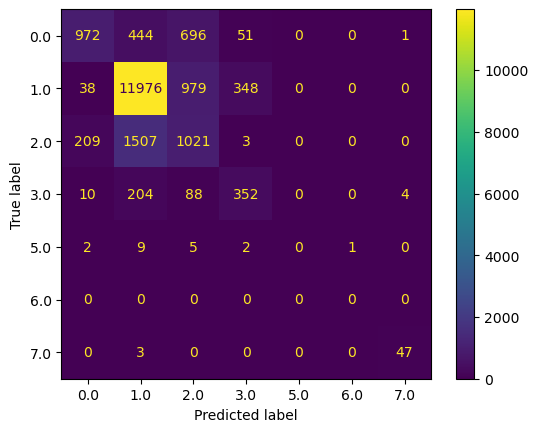

In [60]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_predictions(y_true=y_test,
                                       y_pred=model_y_preds)

In [61]:
test_data["Predicted_Lithofacies"] = model_y_preds

In [62]:
test_data["Predicted_Lithofacies"].unique()

array([1., 3., 0., 7., 6., 2.])

**Visualize lithology Curve**

In [83]:
def make_facies_log_plot(logs, x1, x2, x3, x4, x5, Depth=False):

    logs = logs.fillna(0)
    if Depth == False:
        logs['Depth'] = logs.index
        Depth = 'Depth'
        ztop=logs.Depth.min(); zbot=logs.Depth.max()
    
    else:
        logs['Depth'] = logs[Depth]
        Depth = 'Depth'
        ztop=logs.Depth.min(); zbot=logs.Depth.max()
        
    logs = logs.sort_values(by='Depth', ascending=True)

    facies_colors = [
        'blue', 'purple', 'red', 'orange', 'yellow', 'black', 'green', 'brown', 'white', 'pink', 'gray', 'orchid'
    ]

    facies_labels = [
        "Sandstone", "Shale", "SS/Stone", "Limestone", "Chalk", "Dolomite", "Marl", "Tuff", "Coal", "Anhydrite", "Halite", "Basement"
    ]

    facies_colormap = {}
    for ind, label in enumerate(facies_labels):
        facies_colormap[label] = facies_colors[ind]

    no = 12
    #no = len(list(dict(logs[target].value_counts())))
    cmap_facies = colors.ListedColormap(
            facies_colors[0 : no], 'indexed'
            )

    cluster=np.repeat(np.expand_dims(test_data['FORCE_2020_LITHOFACIES_LITHOLOGY'].astype(float).values,1), 100, 1)
    cluster1=np.repeat(np.expand_dims(test_data['Predicted_Lithofacies'].astype(float).values,1), 100, 1)
    
    f, ax = plt.subplots(nrows=1, ncols=7, figsize=(12, 12))
    ax[0].plot(logs[x1], logs.Depth, '-g')
    ax[1].plot(logs[x2], logs.Depth, '-')
    ax[2].plot(logs[x3], logs.Depth, '-', color='0.5')
    ax[3].plot(logs[x4], logs.Depth, '-', color='r')
    ax[4].plot(logs[x5], logs.Depth, '-', color='black')
    im=ax[5].imshow(cluster, interpolation='none', aspect='auto',
                    cmap=cmap_facies,vmin=0,vmax=11)
    im1=ax[6].imshow(cluster1, interpolation='none', aspect='auto',
                    cmap=cmap_facies,vmin=0,vmax=11)
    
    divider = make_axes_locatable(ax[6])
    cax = divider.append_axes("right", size="20%", pad=0.05)
    cbar=plt.colorbar(im, cax=cax)
    cbar.set_label((7*' ').join([
        "Sandstone", "Shale", "SS/Stone", "Limestone", "Chalk", "Dolomite", "Marl", "Tuff", "Coal", "Anhydrite", "Halite", "Basement"
    ]))
    cbar.set_ticks(range(0,1)); cbar.set_ticklabels('')
    cbar1=plt.colorbar(im1, cax=cax)
    cbar1.set_label((7*' ').join([
        "Sandstone", "Shale", "SS/Stone", "Limestone", "Chalk", "Dolomite", "Marl", "Tuff", "Coal", "Anhydrite", "Halite", "Basement"
    ]))
    cbar1.set_ticks(range(0,1)); cbar1.set_ticklabels('')
    
    for i in range(len(ax)-2):
        ax[i].set_ylim(ztop,zbot)
        ax[i].invert_yaxis()
        ax[i].grid()
        ax[i].locator_params(axis='x', nbins=3)
    
    ax[0].set_xlabel(x1)
    ax[0].set_xlim(0, logs[x1].max())
    ax[1].set_xlabel(x2)
    ax[1].set_xlim(1.8, logs[x2].max())
    ax[2].set_xlabel(x3)
    ax[2].set_xlim(0, logs[x3].max())
    ax[3].set_xlabel(x4)
    ax[3].set_xlim(0, logs[x4].max())
    ax[4].set_xlabel(x5)
    ax[4].set_xscale('log')
    ax[4].set_xlim(logs[x5].min(), logs[x5].max())
    ax[5].set_xlabel('Actual Lithofacies')
    ax[6].set_xlabel('Predicted Lithofacies')
    
    ax[1].set_yticklabels([]); ax[2].set_yticklabels([]); ax[3].set_yticklabels([])
    ax[4].set_yticklabels([]); ax[5].set_yticklabels([]); ax[6].set_yticklabels([])
    ax[5].set_xticklabels([]), ax[6].set_xticklabels([])
    f.suptitle('Well: NNNNN 05', fontsize=14,y=0.94)

In [84]:
import matplotlib.colors as colors

In [85]:
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [86]:
test_data.head()

,FORCE_2020_LITHOFACIES_CONFIDENCE,FORCE_2020_LITHOFACIES_LITHOLOGY,CALI,RDEP,DTC,GR,RHOB,DEPTH_MD,X_LOC,Y_LOC,Z_LOC,Predicted_Lithofacies
DEPT,,,,,,,,,,,,
1409.084,1.0,0,18.200857,0.692898,138.088181,102.547508,2.153297,1409.083984,516083.46875,6822416.0,-1383.008545,1.0
1409.236,1.0,0,18.245287,0.701654,133.719284,103.826286,2.122759,1409.235962,516083.46875,6822416.0,-1383.160522,1.0
1409.388,1.0,0,18.260136,0.730500,129.837051,103.052589,2.116257,1409.387939,516083.46875,6822416.0,-1383.312500,1.0
1409.540,1.0,0,18.251595,0.766511,130.704147,98.439835,2.134779,1409.540039,516083.46875,6822416.0,-1383.464600,1.0
1409.692,1.0,0,18.296978,0.803076,137.085617,97.033768,2.140689,1409.692017,516083.46875,6822416.0,-1383.616577,1.0


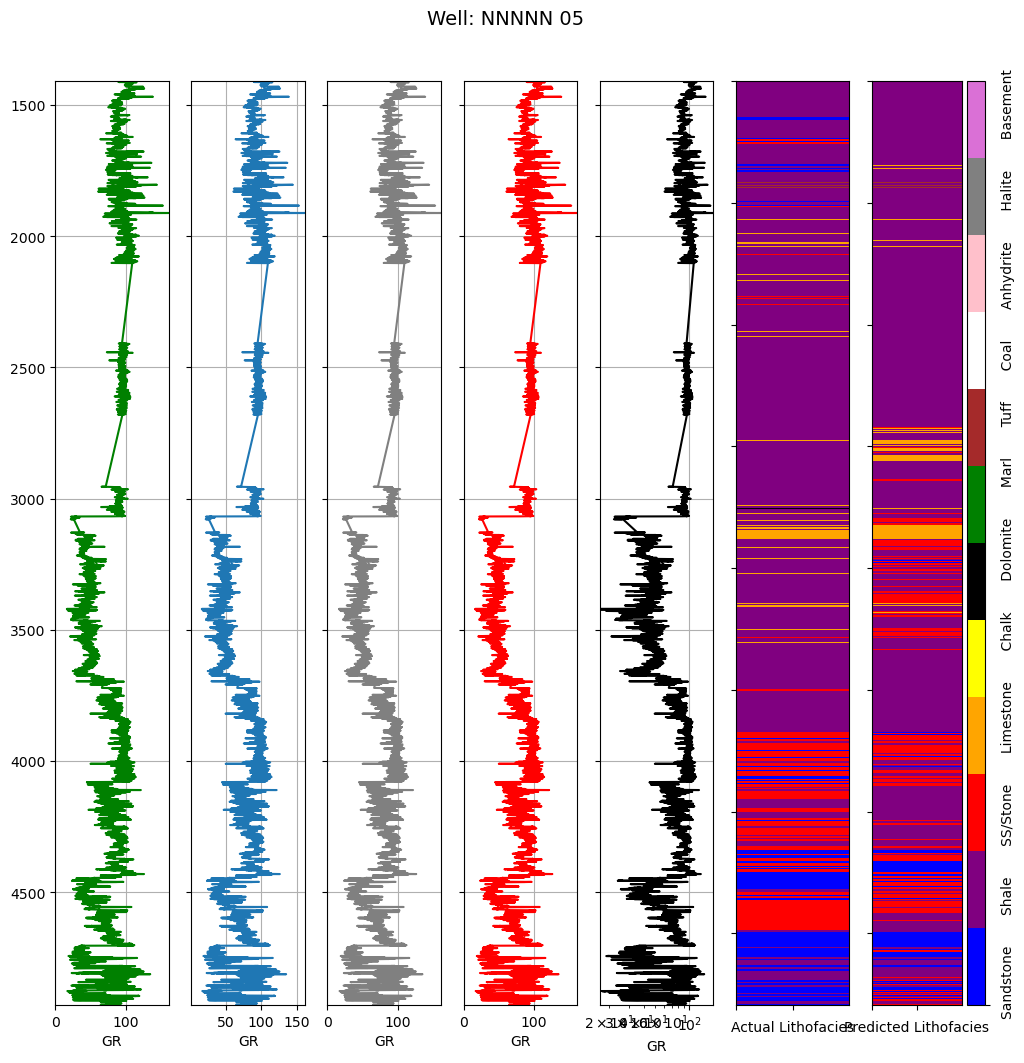

In [87]:
make_facies_log_plot(test_data, "GR", "GR", "GR", "GR", "GR")